In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

import json




# Load the intents dataset
with open('intents.json') as file:
    data = json.load(file)



2024-05-07 10:59:05.146030: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-07 10:59:05.146076: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Extract patterns and tags
patterns = []
tags = []
responses = []
tag_to_index = {}  # To map tags to numerical values
index_to_tag = {}  # To map numerical values back to tags


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from nltk.corpus import stopwords
import nltk
import json

In [4]:
for i, intent in enumerate(data['intents']):
    tag = intent['tag']
    tag_to_index[tag] = i
    index_to_tag[i] = tag

    # Apply preprocessing: removing stop words
    stop_words = set(stopwords.words('english'))
    cleaned_patterns = [word for word in intent['patterns'] if word.lower() not in stop_words]

    patterns.extend(cleaned_patterns)
    tags.extend([i] * len(cleaned_patterns))  # Use numerical values instead of strings
    responses.extend(intent['responses'])


In [5]:
#for i, intent in enumerate(data['intents']):
#    tag = intent['tag']
#    tag_to_index[tag] = i
#    index_to_tag[i] = tag

#    patterns.extend(intent['patterns'])
 #   tags.extend([i] * len(intent['patterns']))  # Use numerical values instead of strings
#    responses.extend(intent['responses'])

# Print the data
print("tag_to_index:", tag_to_index)
print("index_to_tag:", index_to_tag)
print("patterns:", patterns)
print("tags:", tags)
print("responses:", responses)


tag_to_index: {'crop_yield_prediction': 0, 'crop_recommendation': 1, 'fertilizer_recommendation': 2, 'unknown': 3, 'plant_disease_solution': 4}
index_to_tag: {0: 'crop_yield_prediction', 1: 'crop_recommendation', 2: 'fertilizer_recommendation', 3: 'unknown', 4: 'plant_disease_solution'}
patterns: ['How much crop yield can I expect per hectare?', 'What will be my crop yield in tonnes per hectare?', 'Can you predict the expected crop yield for my field?', 'I need to estimate my crop yield. Any advice?', 'Based on my field conditions, what could be the expected yield?', 'What factors influence crop yield per hectare?', 'How does temperature affect crop yield?', 'What role does humidity play in determining crop yield?', 'Can you provide insights into estimating crop yield based on soil type?', 'I want to know the expected crop yield considering the current weather conditions.', 'How can I predict crop yield with information about temperature and humidity?', 'Tell me about crop yield estima

In [6]:
# Tokenize the patterns
tokenizer = Tokenizer()
tokenizer.fit_on_texts(patterns)
total_words = len(tokenizer.word_index) + 1

# Display details
print("Total words after tokenization:", total_words)
print("Word index:", tokenizer.word_index)


Total words after tokenization: 506
Word index: {'my': 1, 'for': 2, 'soil': 3, 'can': 4, 'in': 5, 'i': 6, 'the': 7, 'and': 8, 'crop': 9, 'crops': 10, 'how': 11, 'are': 12, 'what': 13, 'that': 14, 'yield': 15, 'to': 16, 'me': 17, 'about': 18, 'fertilizers': 19, 'you': 20, 'on': 21, 'diseases': 22, 'tell': 23, 'a': 24, 'of': 25, 'conditions': 26, 'best': 27, 'do': 28, 'suitable': 29, 'plant': 30, 'region': 31, 'weather': 32, 'fertilizer': 33, 'specific': 34, 'with': 35, 'plants': 36, 'climate': 37, 'disease': 38, 'based': 39, 'recommendations': 40, 'type': 41, 'impact': 42, 'farming': 43, 'any': 44, 'practices': 45, 'selection': 46, "what's": 47, 'does': 48, 'recommend': 49, 'should': 50, 'well': 51, 'where': 52, 'which': 53, 'provide': 54, 'recommended': 55, 'advice': 56, 'is': 57, 'organic': 58, 'need': 59, 'factors': 60, 'management': 61, 'farm': 62, 'suggest': 63, 'role': 64, 'affecting': 65, 'guide': 66, 'suited': 67, "i'm": 68, 'choose': 69, 'cultivation': 70, 'have': 71, 'take': 7

In [7]:

# Create training data
input_sequences = tokenizer.texts_to_sequences(patterns)
input_padded = pad_sequences(input_sequences)

# Create one-hot encoding for the tags
labels = tf.keras.utils.to_categorical(tags)


In [8]:
# Create training data
input_sequences = tokenizer.texts_to_sequences(patterns)
input_padded = pad_sequences(input_sequences)
# Create one-hot encoding for the tags
labels = tf.keras.utils.to_categorical(tags)
# Display information about the training data
print("Input sequences:")
for seq in input_sequences:
    print(seq)

print("\nInput padded sequences:")
print(input_padded)

print("\nLabels (one-hot encoding):")
print(labels)


Input sequences:
[11, 136, 9, 15, 4, 6, 137, 111, 112]
[13, 193, 79, 1, 9, 15, 5, 334, 111, 112]
[4, 20, 194, 7, 138, 9, 15, 2, 1, 96]
[6, 59, 16, 195, 1, 9, 15, 44, 56]
[39, 21, 1, 96, 26, 13, 97, 79, 7, 138, 15]
[13, 60, 113, 9, 15, 111, 112]
[11, 48, 114, 225, 9, 15]
[13, 64, 48, 89, 73, 5, 226, 9, 15]
[4, 20, 54, 139, 196, 140, 9, 15, 39, 21, 3, 41]
[6, 74, 16, 197, 7, 138, 9, 15, 90, 7, 98, 32, 26]
[11, 4, 6, 194, 9, 15, 35, 115, 18, 114, 8, 89]
[23, 17, 18, 9, 15, 227, 198]
[90, 1, 199, 3, 41, 13, 193, 79, 7, 138, 15]
[13, 57, 7, 335, 99, 114, 8, 9, 15]
[11, 48, 3, 200, 42, 7, 201, 9, 15]
[54, 228, 21, 116, 9, 15, 117, 118, 60]
[13, 336, 337, 338, 4, 6, 119, 16, 339, 9, 15]
[11, 4, 6, 141, 1, 96, 26, 2, 120, 9, 15]
[13, 12, 7, 27, 45, 2, 202, 9, 15, 111, 112]
[229, 40, 2, 100, 9, 15, 39, 21, 118, 60]
[13, 57, 7, 340, 9, 15, 111, 112, 5, 1, 31]
[11, 4, 6, 341, 7, 201, 15, 25, 1, 10]
[13, 12, 7, 342, 60, 65, 9, 15]
[23, 17, 18, 343, 230, 198, 2, 116, 9, 15]
[11, 4, 344, 32, 142, 12

In [9]:

# Build the model
model = Sequential([
    Embedding(total_words, 16, input_length=input_padded.shape[1]),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(len(data['intents']), activation='softmax')
])

2024-05-07 10:59:20.028385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-07 10:59:20.028457: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-07 10:59:20.028497: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (admin1-HP-EliteBook-840-G1): /proc/driver/nvidia/version does not exist
2024-05-07 10:59:20.030651: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(input_padded, labels, epochs=1000)

# Save the model
model.save('chatbot_model.h5')


2024-05-07 10:59:23.503375: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-05-07 10:59:23.508296: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2494170000 Hz


Epoch 1/1000
14/14 [==============================] - 1s 2ms/step - loss: 1.5999 - accuracy: 0.2810
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 1.5593 - accuracy: 0.3000
Epoch 3/1000
14/14 [==============================] - 0s 4ms/step - loss: 1.5105 - accuracy: 0.3310
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.4415 - accuracy: 0.5190
Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 1.3477 - accuracy: 0.5857
Epoch 6/1000
14/14 [==============================] - 0s 3ms/step - loss: 1.2321 - accuracy: 0.7095
Epoch 7/1000
14/14 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.7952
Epoch 8/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.9613 - accuracy: 0.8214
Epoch 9/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.8322 - accuracy: 0.8262
Epoch 10/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.8500

14/14 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 83/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 84/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 85/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 86/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 87/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 88/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 89/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 90/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 91/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoc

Epoch 161/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.7529e-04 - accuracy: 1.0000
Epoch 162/1000
14/14 [==============================] - 0s 3ms/step - loss: 4.6787e-04 - accuracy: 1.0000
Epoch 163/1000
14/14 [==============================] - 0s 3ms/step - loss: 4.6042e-04 - accuracy: 1.0000
Epoch 164/1000
14/14 [==============================] - 0s 2ms/step - loss: 4.5399e-04 - accuracy: 1.0000
Epoch 165/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.4749e-04 - accuracy: 1.0000
Epoch 166/1000
14/14 [==============================] - 0s 3ms/step - loss: 4.4076e-04 - accuracy: 1.0000
Epoch 167/1000
14/14 [==============================] - 0s 3ms/step - loss: 4.3402e-04 - accuracy: 1.0000
Epoch 168/1000
14/14 [==============================] - 0s 3ms/step - loss: 4.2826e-04 - accuracy: 1.0000
Epoch 169/1000
14/14 [==============================] - 0s 3ms/step - loss: 4.2173e-04 - accuracy: 1.0000
Epoch 170/1000
14/14 [========================

14/14 [==============================] - 0s 1ms/step - loss: 1.7223e-04 - accuracy: 1.0000
Epoch 239/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.7010e-04 - accuracy: 1.0000
Epoch 240/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.6821e-04 - accuracy: 1.0000
Epoch 241/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.6633e-04 - accuracy: 1.0000
Epoch 242/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.6447e-04 - accuracy: 1.0000
Epoch 243/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.6255e-04 - accuracy: 1.0000
Epoch 244/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.6071e-04 - accuracy: 1.0000
Epoch 245/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.5884e-04 - accuracy: 1.0000
Epoch 246/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.5701e-04 - accuracy: 1.0000
Epoch 247/1000
14/14 [==============================] - 0s 1m

14/14 [==============================] - 0s 1ms/step - loss: 7.5557e-05 - accuracy: 1.0000
Epoch 316/1000
14/14 [==============================] - 0s 1ms/step - loss: 7.4686e-05 - accuracy: 1.0000
Epoch 317/1000
14/14 [==============================] - 0s 2ms/step - loss: 7.4024e-05 - accuracy: 1.0000
Epoch 318/1000
14/14 [==============================] - 0s 1ms/step - loss: 7.3277e-05 - accuracy: 1.0000
Epoch 319/1000
14/14 [==============================] - 0s 1ms/step - loss: 7.2518e-05 - accuracy: 1.0000
Epoch 320/1000
14/14 [==============================] - 0s 1ms/step - loss: 7.1818e-05 - accuracy: 1.0000
Epoch 321/1000
14/14 [==============================] - 0s 1ms/step - loss: 7.1096e-05 - accuracy: 1.0000
Epoch 322/1000
14/14 [==============================] - 0s 1ms/step - loss: 7.0388e-05 - accuracy: 1.0000
Epoch 323/1000
14/14 [==============================] - 0s 1ms/step - loss: 6.9751e-05 - accuracy: 1.0000
Epoch 324/1000
14/14 [==============================] - 0s 1m

14/14 [==============================] - 0s 1ms/step - loss: 3.6206e-05 - accuracy: 1.0000
Epoch 393/1000
14/14 [==============================] - 0s 1ms/step - loss: 3.5874e-05 - accuracy: 1.0000
Epoch 394/1000
14/14 [==============================] - 0s 1ms/step - loss: 3.5568e-05 - accuracy: 1.0000
Epoch 395/1000
14/14 [==============================] - 0s 1ms/step - loss: 3.5247e-05 - accuracy: 1.0000
Epoch 396/1000
14/14 [==============================] - 0s 1ms/step - loss: 3.4917e-05 - accuracy: 1.0000
Epoch 397/1000
14/14 [==============================] - 0s 1ms/step - loss: 3.4615e-05 - accuracy: 1.0000
Epoch 398/1000
14/14 [==============================] - 0s 2ms/step - loss: 3.4284e-05 - accuracy: 1.0000
Epoch 399/1000
14/14 [==============================] - 0s 1ms/step - loss: 3.3979e-05 - accuracy: 1.0000
Epoch 400/1000
14/14 [==============================] - 0s 1ms/step - loss: 3.3717e-05 - accuracy: 1.0000
Epoch 401/1000
14/14 [==============================] - 0s 1m

14/14 [==============================] - 0s 1ms/step - loss: 1.8430e-05 - accuracy: 1.0000
Epoch 470/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.8290e-05 - accuracy: 1.0000
Epoch 471/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.8113e-05 - accuracy: 1.0000
Epoch 472/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.7944e-05 - accuracy: 1.0000
Epoch 473/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.7781e-05 - accuracy: 1.0000
Epoch 474/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.7621e-05 - accuracy: 1.0000
Epoch 475/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.7486e-05 - accuracy: 1.0000
Epoch 476/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.7323e-05 - accuracy: 1.0000
Epoch 477/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.7175e-05 - accuracy: 1.0000
Epoch 478/1000
14/14 [==============================] - 0s 1m

14/14 [==============================] - 0s 1ms/step - loss: 9.6306e-06 - accuracy: 1.0000
Epoch 547/1000
14/14 [==============================] - 0s 1ms/step - loss: 9.5608e-06 - accuracy: 1.0000
Epoch 548/1000
14/14 [==============================] - 0s 1ms/step - loss: 9.4779e-06 - accuracy: 1.0000
Epoch 549/1000
14/14 [==============================] - 0s 1ms/step - loss: 9.3987e-06 - accuracy: 1.0000
Epoch 550/1000
14/14 [==============================] - 0s 1ms/step - loss: 9.3152e-06 - accuracy: 1.0000
Epoch 551/1000
14/14 [==============================] - 0s 1ms/step - loss: 9.2358e-06 - accuracy: 1.0000
Epoch 552/1000
14/14 [==============================] - 0s 1ms/step - loss: 9.1651e-06 - accuracy: 1.0000
Epoch 553/1000
14/14 [==============================] - 0s 1ms/step - loss: 9.0859e-06 - accuracy: 1.0000
Epoch 554/1000
14/14 [==============================] - 0s 1ms/step - loss: 9.0249e-06 - accuracy: 1.0000
Epoch 555/1000
14/14 [==============================] - 0s 1m

14/14 [==============================] - 0s 1ms/step - loss: 5.1132e-06 - accuracy: 1.0000
Epoch 624/1000
14/14 [==============================] - 0s 1ms/step - loss: 5.0749e-06 - accuracy: 1.0000
Epoch 625/1000
14/14 [==============================] - 0s 1ms/step - loss: 5.0357e-06 - accuracy: 1.0000
Epoch 626/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.9928e-06 - accuracy: 1.0000
Epoch 627/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.9511e-06 - accuracy: 1.0000
Epoch 628/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.9100e-06 - accuracy: 1.0000
Epoch 629/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.8717e-06 - accuracy: 1.0000
Epoch 630/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.8302e-06 - accuracy: 1.0000
Epoch 631/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.7990e-06 - accuracy: 1.0000
Epoch 632/1000
14/14 [==============================] - 0s 1m

14/14 [==============================] - 0s 1ms/step - loss: 2.7583e-06 - accuracy: 1.0000
Epoch 701/1000
14/14 [==============================] - 0s 1ms/step - loss: 2.7373e-06 - accuracy: 1.0000
Epoch 702/1000
14/14 [==============================] - 0s 1ms/step - loss: 2.7120e-06 - accuracy: 1.0000
Epoch 703/1000
14/14 [==============================] - 0s 1ms/step - loss: 2.6918e-06 - accuracy: 1.0000
Epoch 704/1000
14/14 [==============================] - 0s 1ms/step - loss: 2.6717e-06 - accuracy: 1.0000
Epoch 705/1000
14/14 [==============================] - 0s 1ms/step - loss: 2.6476e-06 - accuracy: 1.0000
Epoch 706/1000
14/14 [==============================] - 0s 3ms/step - loss: 2.6286e-06 - accuracy: 1.0000
Epoch 707/1000
14/14 [==============================] - 0s 1ms/step - loss: 2.6084e-06 - accuracy: 1.0000
Epoch 708/1000
14/14 [==============================] - 0s 1ms/step - loss: 2.5848e-06 - accuracy: 1.0000
Epoch 709/1000
14/14 [==============================] - 0s 1m

14/14 [==============================] - 0s 1ms/step - loss: 1.4986e-06 - accuracy: 1.0000
Epoch 778/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.4864e-06 - accuracy: 1.0000
Epoch 779/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.4788e-06 - accuracy: 1.0000
Epoch 780/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.4674e-06 - accuracy: 1.0000
Epoch 781/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.4544e-06 - accuracy: 1.0000
Epoch 782/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.4436e-06 - accuracy: 1.0000
Epoch 783/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.4305e-06 - accuracy: 1.0000
Epoch 784/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.4209e-06 - accuracy: 1.0000
Epoch 785/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.4061e-06 - accuracy: 1.0000
Epoch 786/1000
14/14 [==============================] - 0s 1m

14/14 [==============================] - 0s 1ms/step - loss: 8.2027e-07 - accuracy: 1.0000
Epoch 855/1000
14/14 [==============================] - 0s 1ms/step - loss: 8.1119e-07 - accuracy: 1.0000
Epoch 856/1000
14/14 [==============================] - 0s 1ms/step - loss: 8.0495e-07 - accuracy: 1.0000
Epoch 857/1000
14/14 [==============================] - 0s 2ms/step - loss: 7.9643e-07 - accuracy: 1.0000
Epoch 858/1000
14/14 [==============================] - 0s 1ms/step - loss: 7.8934e-07 - accuracy: 1.0000
Epoch 859/1000
14/14 [==============================] - 0s 1ms/step - loss: 7.8479e-07 - accuracy: 1.0000
Epoch 860/1000
14/14 [==============================] - 0s 1ms/step - loss: 7.7912e-07 - accuracy: 1.0000
Epoch 861/1000
14/14 [==============================] - 0s 2ms/step - loss: 7.7514e-07 - accuracy: 1.0000
Epoch 862/1000
14/14 [==============================] - 0s 1ms/step - loss: 7.6720e-07 - accuracy: 1.0000
Epoch 863/1000
14/14 [==============================] - 0s 1m

14/14 [==============================] - 0s 1ms/step - loss: 4.4732e-07 - accuracy: 1.0000
Epoch 932/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.4448e-07 - accuracy: 1.0000
Epoch 933/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.4136e-07 - accuracy: 1.0000
Epoch 934/1000
14/14 [==============================] - 0s 3ms/step - loss: 4.3852e-07 - accuracy: 1.0000
Epoch 935/1000
14/14 [==============================] - 0s 2ms/step - loss: 4.3653e-07 - accuracy: 1.0000
Epoch 936/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.3199e-07 - accuracy: 1.0000
Epoch 937/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.3000e-07 - accuracy: 1.0000
Epoch 938/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.2490e-07 - accuracy: 1.0000
Epoch 939/1000
14/14 [==============================] - 0s 1ms/step - loss: 4.2007e-07 - accuracy: 1.0000
Epoch 940/1000
14/14 [==============================] - 0s 1m

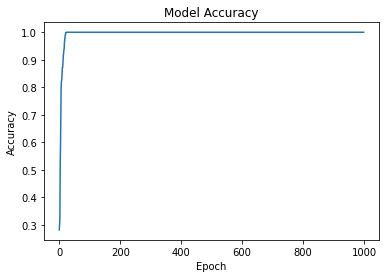

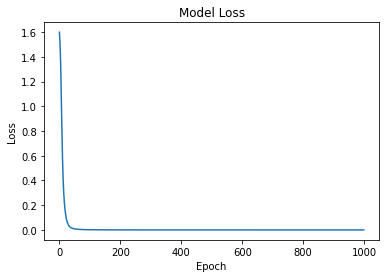

In [11]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np


In [13]:
# Evaluate the model on the training data
predictions = model.predict(input_padded)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

# Classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        61
           4       1.00      1.00      1.00        90

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Assume your data and labels are loaded and processed already

# Set up 5-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
all_true_labels = []
all_predicted_labels = []

# Iterate over the folds
for fold, (train_indices, test_indices) in enumerate(kfold.split(input_padded, np.argmax(labels, axis=1))):
    # Build the model
    model = Sequential([
        Embedding(total_words, 16, input_length=input_padded.shape[1]),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(len(data['intents']), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the current fold
    history = model.fit(input_padded[train_indices], labels[train_indices], epochs=100, verbose=0)

    # Evaluate the model on the test data for this fold
    predictions = model.predict(input_padded[test_indices])
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels[test_indices], axis=1)

    # Append true and predicted labels for later analysis
    all_true_labels.extend(true_labels)
    all_predicted_labels.extend(predicted_labels)

    # Print classification report for each fold
    print(f"\nClassification Report - Fold {fold + 1}:\n")
    print(classification_report(true_labels, predicted_labels))

# Print overall classification report
print("\nOverall Classification Report:\n")
print(classification_report(all_true_labels, all_predicted_labels))



Classification Report - Fold 1:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.85      1.00      0.92        23
           2       1.00      0.82      0.90        17
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        18

    accuracy                           0.95        84
   macro avg       0.97      0.95      0.96        84
weighted avg       0.96      0.95      0.95        84


Classification Report - Fold 2:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.81      0.92      0.86        24
           2       0.80      0.71      0.75        17
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        18

    accuracy                           0.90        84
   macro avg       0.92      0.91      0.91        84
weighted 

In [15]:

# Test the model with user input
# Test the model with user input
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break

    # Tokenize and pad user input
    user_input_sequence = tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=input_padded.shape[1])

    # Make a prediction
    prediction = model.predict(user_input_padded)
    

    # Get the predicted tag
    predicted_tag = index_to_tag[tf.argmax(prediction[0]).numpy()]  # Convert to numpy array
    print("the tag predicted is",predicted_tag)

    # Get a random response for the predicted tag
    response = data['intents'][tag_to_index[predicted_tag]]['responses']

    print("Chatbot:", response[0])



You: Where are you going?
the tag predicted is unknown
Chatbot: I'm sorry, I'm here to help with specific topics like agriculture and farming. If you have any questions related to that, feel free to ask!


KeyboardInterrupt: Interrupted by user

In [16]:
import pickle

In [17]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [18]:
tokenizer

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import json
import pickle

# Load the intents dataset
with open('intents.json') as file:
    data = json.load(file)

# ... (rest of your code)

# Save the tokenizer and mapping dictionaries
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tag_to_index.pickle', 'wb') as handle:
    pickle.dump(tag_to_index, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('index_to_tag.pickle', 'wb') as handle:
    pickle.dump(index_to_tag, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the model
model.save('chatbot_model.h5')

# Loading the tokenizer and mapping dictionaries
with open('tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

with open('tag_to_index.pickle', 'rb') as handle:
    loaded_tag_to_index = pickle.load(handle)

with open('index_to_tag.pickle', 'rb') as handle:
    loaded_index_to_tag = pickle.load(handle)

# Load the model
loaded_model = tf.keras.models.load_model('chatbot_model.h5')

# Test the loaded model with user input
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break

    # Tokenize and pad user input using the loaded tokenizer
    user_input_sequence = loaded_tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=input_padded.shape[1])

    # Make a prediction using the loaded model
    prediction = loaded_model.predict(user_input_padded)
    print(prediction)

    # Get the predicted tag using the loaded mapping dictionaries
    predicted_tag = loaded_index_to_tag[tf.argmax(prediction[0]).numpy()]

    # Get a random response for the predicted tag
    response = data['intents'][loaded_tag_to_index[predicted_tag]]['responses']

    print("Chatbot:", response)


You: Where is the nearest coffee shop?
[[5.3924957e-04 2.8936283e-05 1.9422318e-03 9.9715960e-01 3.2996468e-04]]
Chatbot: ["I'm sorry, I'm here to help with specific topics like agriculture and farming. If you have any questions related to that, feel free to ask!"]


KeyboardInterrupt: Interrupted by user